# Recommendation Engine EDA & Model

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
%time Music_Data=pd.read_csv(r"data.csv")
Music_Data.head(60)

Wall time: 437 ms


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.2790,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.7320,['Dennis Day'],0.8190,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.3280,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.9670,['Frank Parker'],0.2750,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.9570,['Phil Regan'],0.4180,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.5790,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.6970,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.9960,['John McCormack'],0.5180,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.9930,['Sergei Rachmaninoff'],0.3890,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.9960,['Ignacio Corsini'],0.4850,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.9820,['Fortugé'],0.6840,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


### Data Understanding

In [4]:
Music_Data=Music_Data.drop(columns=["id","release_date"])

In [4]:
Music_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  speechiness       170653 non-null  float64
 16  tempo             17

## Clustering

In [5]:
Cluster_Data_first=Music_Data.copy()

In [6]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=150))])#, n_jobs=-1
X = Music_Data.select_dtypes(np.number)
cluster_pipeline.fit(X)
Cluster_Data_first['cluster_label'] = cluster_pipeline.predict(X)

In [7]:
Cluster_Data_first

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,cluster_label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,36
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,143
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,0.0339,110.339,51
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,0.0354,100.109,35
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029,29
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936,29
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688,59
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055,108


In [8]:
Cluster_Data=Cluster_Data_first.copy()

In [10]:
Cluster_Data.to_csv('Clustered_data.csv')

## 3-D Model with PCA Components

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=3)

In [11]:
ss=StandardScaler()
scaled_df=ss.fit_transform(Music_Data.drop(columns=["name","artists"]))

In [12]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.782825,-2.152470,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,1.365588,2.626719,-1.514237,0.643912,-1.256808,-0.379706,-1.169307
1,1.650688,-2.152470,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,0.512123,-0.262229,-0.170766,0.643912,-1.210993,1.945481,-1.821180
2,-1.858821,-2.152470,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.625830,-0.599749,-0.593551,0.643912,-1.210993,-0.396297,-0.212404
3,-1.381564,-2.152470,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,-0.056853,1.002043,0.377680,0.643912,-1.302624,-0.387080,-0.545537
4,-1.047180,-2.152470,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,-0.625830,0.132499,0.240788,0.643912,-1.348440,-0.371104,-0.494867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.301754,1.667302,-1.110321,1.411425,0.561107,1.216579,-0.303955,-0.531849,0.512123,-0.707298,1.362950,0.643912,1.858663,-0.063250,-0.385320
170649,0.780531,1.667302,-0.787475,1.019685,-0.636660,1.011083,-0.303955,-0.532771,0.512123,-0.599749,0.956136,0.643912,1.675400,-0.232846,0.686274
170650,0.411949,1.667302,-1.066708,0.548461,-0.155952,1.403394,-0.303955,-0.532743,-0.341342,0.298399,1.621992,-1.553007,2.041926,-0.107492,-0.819761
170651,-1.267570,1.667302,-1.308762,0.758525,0.842058,0.525365,3.289955,-0.532746,-0.910318,2.500864,0.755887,0.643912,1.767032,1.287989,-1.361404


In [13]:
PCA_Values=pd.DataFrame(pca.fit_transform(scaled_df))
PCA_Values.columns=["PC1","PC2","PC3"]
PCA_Values

,PC1,PC2,PC3
0,4.282665,2.295423,1.761000
1,1.393686,-3.515632,-0.614153
2,3.852965,1.734338,0.408326
3,2.538960,0.304873,-0.215701
4,2.551290,-0.275417,-0.580288
...,...,...,...
170648,-3.263871,0.572884,-0.176827
170649,-2.968664,0.167855,-0.855453
170650,-3.309011,0.673842,0.323262
170651,-2.741520,-0.216908,3.992091


<function matplotlib.pyplot.show(close=None, block=None)>

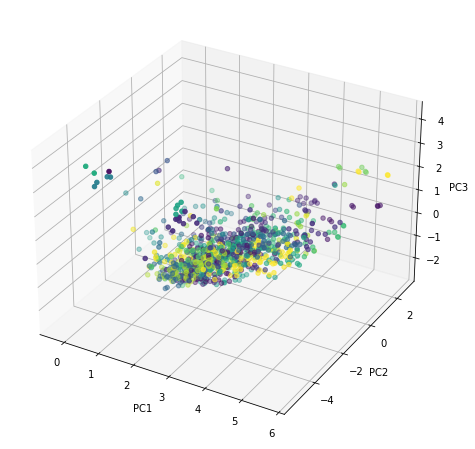

In [14]:
True_Values=Cluster_Data['cluster_label'].head(1000)

x=PCA_Values["PC1"].head(1000)
y=PCA_Values["PC2"].head(1000)
z=PCA_Values["PC3"].head(1000)

plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z,c=True_Values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

## Finding optimum number of clusters

In [15]:
# wcss = []

# for i in range(1,51):
#     kmeans = KMeans(n_clusters=i,random_state=12)
#     kmeans.fit(scaled_df)
#     wcss.append(kmeans.inertia_)

## Elbow Method

In [16]:
# plt.plot(range(1,51),wcss)
# plt.title('ELBOW METHOD')
# plt.ylabel('WCSS')
# plt.show()

In [17]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df["cluster_label"]=Cluster_Data["cluster_label"]
scaled_df.index=Cluster_Data_first["name"]
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_label
name,,,,,,,,,,,,,,,,
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",-1.782825,-2.152470,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,1.365588,2.626719,-1.514237,0.643912,-1.256808,-0.379706,-1.169307,113
Clancy Lowered the Boom,1.650688,-2.152470,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,0.512123,-0.262229,-0.170766,0.643912,-1.210993,1.945481,-1.821180,106
Gati Bali,-1.858821,-2.152470,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.625830,-0.599749,-0.593551,0.643912,-1.210993,-0.396297,-0.212404,16
Danny Boy,-1.381564,-2.152470,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,-0.056853,1.002043,0.377680,0.643912,-1.302624,-0.387080,-0.545537,15
When Irish Eyes Are Smiling,-1.047180,-2.152470,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,-0.625830,0.132499,0.240788,0.643912,-1.348440,-0.371104,-0.494867,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,0.301754,1.667302,-1.110321,1.411425,0.561107,1.216579,-0.303955,-0.531849,0.512123,-0.707298,1.362950,0.643912,1.858663,-0.063250,-0.385320,28
Halloweenie III: Seven Days,0.780531,1.667302,-0.787475,1.019685,-0.636660,1.011083,-0.303955,-0.532771,0.512123,-0.599749,0.956136,0.643912,1.675400,-0.232846,0.686274,103
AYA,0.411949,1.667302,-1.066708,0.548461,-0.155952,1.403394,-0.303955,-0.532743,-0.341342,0.298399,1.621992,-1.553007,2.041926,-0.107492,-0.819761,78


## Error for space allocation

In [18]:
# from scipy.spatial.distance import pdist, squareform
# distances = squareform(pdist(PCA_Values.values, metric='euclidean'))

## Recommendation Engine

In [20]:
def get_reccomendation(song_name):
    
    if len(list(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values)
        df = scaled_df[scaled_df['cluster_label']==scaled_df['cluster_label'][index]]
        
        distances = pd.DataFrame(data=pairwise_distances(X=df ,Y=None,metric='euclidean')).round(2)
        distances.index   = df.index # movie_data['userId'].unique()
        distances.columns = df.index
        
        rec_df = pd.DataFrame(distances[song_name])  #.sort_values(by=distances[name], ascending = True, axis=0)
        rec = rec_df.sort_values(song_name, axis = 0, ascending = True, inplace = False, na_position ='last')
        
        return pd.DataFrame(rec.iloc[1:12].index.values, columns=['Similar songs'])

## Recommendation with Name of song as input

In [21]:
%time get_reccomendation("All About U")

CPU times: total: 828 ms
Wall time: 360 ms


,Similar songs
0,This Is How We Do
1,I Wonder If Heaven Got A Ghetto - Hip-Hop Version
2,She Neva Seen
3,Check Yo Self - Remix
4,We Luv Deez Hoez (feat. Backbone & Big Gipp)
5,Connected For Life
6,Take Your Time
7,I Know What Girls Like
8,Check Yo Self
9,Cum On Everybody


## Recommendation based on Artist

### Data Understanding

In [22]:
Artist_Rec_Data=Cluster_Data_first.copy()

In [23]:
Artist_Data=pd.read_csv(r"D:\Project\Recommendation_Engine\Data\data_by_artist.csv")

In [24]:
Artist_Data=Artist_Data.iloc[0:28300]

In [25]:
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("[", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("]", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("'", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\'", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\(", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\)", "")

In [26]:
Artist_Data_scaled=pd.DataFrame(ss.fit_transform(Artist_Data.drop(columns=["artists"])))
Artist_Data_scaled.index=Artist_Data["artists"]
Artist_Data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
artists,,,,,,,,,,,,,,
"""Cats"" 1981 Original London Cast",0.561897,-0.095231,0.258411,-0.448004,0.089966,-0.410984,-0.547343,0.629088,-0.572328,1.043508,0.066059,-0.497983,0.180519,-0.115642
"""Cats"" 1983 Broadway Cast",0.561897,0.243671,0.994713,-0.591945,0.394004,-0.360827,-0.313749,0.802192,0.076648,0.736917,-0.513027,-0.991416,-0.167667,-0.115642
"""Fiddler On The Roof” Motion Picture Chorus",0.561897,-0.135101,0.978585,-1.119596,0.736526,-0.831812,-0.503165,0.877238,-0.707497,0.219339,-1.539984,-0.639683,0.024472,-1.552287
"""Fiddler On The Roof” Motion Picture Orchestra",0.561897,0.263606,1.055220,-0.685999,0.193384,-0.991637,-0.339102,0.520096,-0.778068,0.261373,-1.088214,-0.569443,0.024235,-1.552287
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.561897,-0.135101,0.043822,-0.448452,0.255450,-0.041664,-0.554039,-0.051293,0.154927,0.040184,0.278815,-0.118461,0.390006,-0.115642


In [34]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=30))])#, n_jobs=-1
X = Artist_Data.select_dtypes(np.number)
cluster_pipeline.fit(X)
Artist_Data['cluster_label'] = cluster_pipeline.predict(X)

In [28]:
#distances = pd.DataFrame(data=pairwise_distances(X=Artist_Data_scaled ,Y=None,metric='euclidean')).round(2)

## Artist name as Input

In [87]:
def get_similar_Artist(artist_name):
    if len(list(Artist_Data[Artist_Data['artists']==artist_name].index.values))==0:
        print("Artist Not available in the Database")
    else:
        index = int(Artist_Data[Artist_Data['artists']==artist_name].index.values)
        df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
        artist_index=df["artists"]
        distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
        distances.index   = artist_index
        distances.columns = artist_index
        
        art_df = pd.DataFrame(distances[artist_name])
        art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')

    return pd.DataFrame(art.head(5).index)

In [88]:
get_similar_Artist('"Cats" 1983 Broadway Cast')

,artists
0,"""Cats"" 1983 Broadway Cast"
1,Karen Holness
2,La Sonora Altepexana
3,Michael Behringer
4,Emmy Rossum


In [127]:
def artist(song_name):
    if len(list(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values)
        Ar = Artist_Rec_Data.iloc[index,3]
        Artists = Ar.split(",")
            
        return (Artists)

In [130]:
artist("A Midsummer Night's Dream, Op. 61: Scherzo")

['Felix Mendelssohn', ' Arturo Toscanini']

In [136]:
artist("All About U")

['2Pac', ' Snoop Dogg', ' Nate Dogg', ' Dru Down']

In [103]:
artist("Rapunzel")

['Dave Matthews Band']

## Song Name as Input

In [116]:
def similar_Artist(song_name):
    
    if len(list(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values)
        Ar = Artist_Rec_Data.iloc[index,3]
        artist_name = Ar.split(",")
        
        if len(artist_name)==1:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')

            return pd.DataFrame(art.head(5).index)
        
        elif len(artist_name)==2:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=art.head(3)
            
            index = int(Artist_Data[Artist_Data['artists']==artist_name[1]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=pd.concat(Merged_Df,art.head(2),axis=0)
            
            return Merged_Df
        
        else:
            
            return pd.DataFrame(artist_name)
               

In [117]:
similar_Artist("Rapunzel")

,artists
0,Dave Matthews Band
1,Bethel Music
2,Wax Fang
3,Hillsong Worship
4,J.J. Grey


In [118]:
similar_Artist("All About U")

,0
0,2Pac
1,Snoop Dogg
2,Nate Dogg
3,Dru Down


In [1]:
from pickle import dump